<a href="https://colab.research.google.com/github/Olena-24/Science-HW/blob/main/HW_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time
from sklearn.metrics import classification_report

In [3]:
# Завантаження датасету
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Нормалізація даних
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

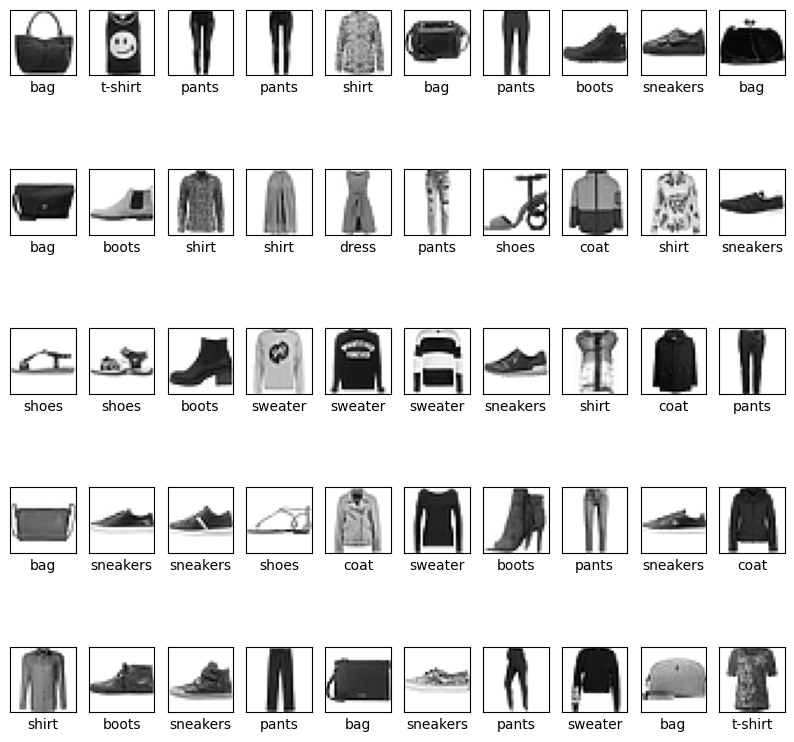

In [5]:
# Візуалізація даних
classes = [
    "t-shirt", "pants", "sweater", "dress", "coat",
    "shoes", "shirt", "sneakers", "bag", "boots"
]

plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()


In [9]:
# Побудова згорткової нейромережі
def create_cnn_model():
    model = Sequential([
        layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
# Колбеки
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)


In [11]:
# Вимірювання часу навчання моделі
start_time = time.time()
cnn_history = cnn_model.fit(
    X_train, y_train, epochs=50, batch_size=64,
    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()
cnn_training_time = end_time - start_time


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 179s 183ms/step - accuracy: 0.7023 - loss: 0.8798 - val_accuracy: 0.8643 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 216s 198ms/step - accuracy: 0.8494 - loss: 0.4091 - val_accuracy: 0.8826 - val_loss: 0.3226 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 170s 181ms/step - accuracy: 0.8716 - loss: 0.3555 - val_accuracy: 0.8855 - val_loss: 0.3052 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 176s 187ms/step - accuracy: 0.8808 - loss: 0.3232 - val_accuracy: 0.8916 - val_loss: 0.3108 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 189ms/step - accuracy: 0.8893 - loss: 0.2996 - val_accuracy: 0.8932 - val_loss: 0.2906 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 176s 188ms/step - accuracy: 0.8981 - loss: 0.2784 - val_accuracy: 0.8830 - val_loss: 0.3282 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 188ms/step - accura

In [12]:

# Оцінка моделі
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)

# Виведення результатів
print(f"CNN Model training time: {cnn_training_time:.2f} seconds")
print(f"Test accuracy: {cnn_test_accuracy}")
print(f"Test loss: {cnn_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9305 - loss: 0.2094
CNN Model training time: 9673.87 seconds
Test accuracy: 0.9337000250816345
Test loss: 0.19934377074241638


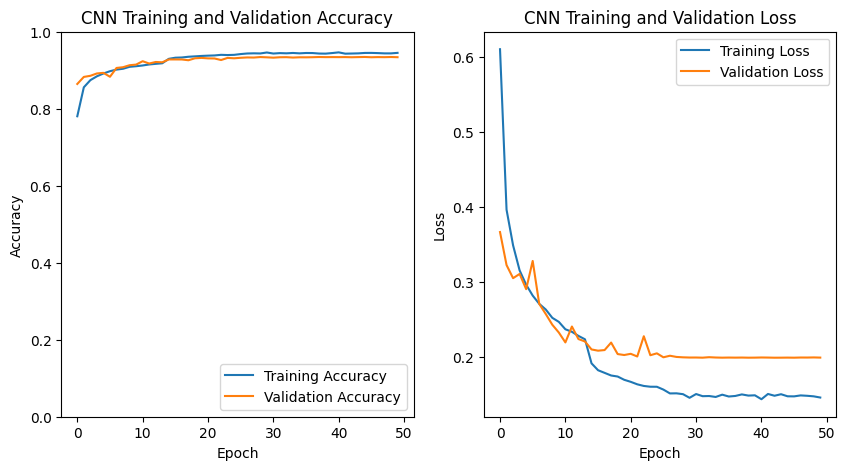

In [13]:
# Графік точності навчання та валідації
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('CNN Training and Validation Accuracy')
plt.legend(loc='lower right')

# Графік втрат навчання та валідації
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [14]:
# Виведення метрик для CNN
cnn_test_pred = cnn_model.predict(X_test)
cnn_test_pred_classes = np.argmax(cnn_test_pred, axis=1)
cnn_report = classification_report(y_test, cnn_test_pred_classes)
print("Classification report for CNN Model:")
print(cnn_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification report for CNN Model:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.91      0.90      1000
           3       0.93      0.94      0.94      1000
           4       0.90      0.92      0.91      1000
           5       0.99      0.98      0.99      1000
           6       0.81      0.78      0.80      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Висновки.



**Порівняння результатів**

---



*Час навчання:*

Навчання згорткової нейромережі (CNN) зайняло більше часу (3769.59 секунд) порівняно з багатошаровою моделлю (MLP) (553.54 секунд).
Пошук гіперпараметрів для MLP додатково зайняв 3074.15 секунд.

*Точність і втрати:*

Згорткова нейромережа (CNN) показала кращу точність на тестовому наборі (93.33%) порівняно з багатошаровою моделлю (MLP) (89.36%).
Втрати на тестовому наборі для CNN були нижчими (0.1976) порівняно з MLP (0.3031).

*Класифікаційний звіт:*

Згорткова нейромережа показала кращі результати за всіма метриками (точність, повнота, значення F1) у порівнянні з багатошаровою моделлю.

**Висновки**


---


Згорткова нейромережа (CNN) демонструє кращі результати в задачах класифікації зображень з датасету Fashion MNIST порівняно з багатошаровою моделлю (MLP).
Незважаючи на те, що час навчання CNN значно довший, вона забезпечує вищу точність і менші втрати на тестовому наборі.
Згорткова нейромережа також показує кращі метрики класифікації (точність, повнота, значення F1), що підтверджує її перевагу в задачах класифікації зображень.
Отже, для задач класифікації зображень, таких як Fashion MNIST, використання згорткових нейромереж є більш доцільним завдяки їх високій точності та ефективності.








**Частина 2: Використання VGG16 як згорткової основи**


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [ ]:
# Завантаження датасету
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Нормалізація даних
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# Підготовка даних (потрібно змінити розмір зображень до 32x32 та повторити канали)
X_train_vgg = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test_vgg = np.repeat(X_test[..., np.newaxis], 3, -1)
X_train_vgg = np.array([np.resize(img, (32, 32, 3)) for img in X_train_vgg])
X_test_vgg = np.array([np.resize(img, (32, 32, 3)) for img in X_test_vgg])


In [ ]:
# Завантаження попередньо навченої моделі VGG16 без верхніх шарів
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Додавання власних шарів зверху
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation="softmax")(x)

In [ ]:
# Створення повної моделі
vgg_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Замороження шарів базової моделі
for layer in base_model.layers:
    layer.trainable = False

vgg_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Колбеки
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
# Вимірювання часу навчання моделі
start_time = time.time()
vgg_history = vgg_model.fit(
    X_train_vgg, y_train, epochs=50, batch_size=64,
    validation_data=(X_test_vgg, y_test), callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()
vgg_training_time = end_time - start_time

Epoch 1/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5963 - loss: 1.1339 - val_accuracy: 0.7468 - val_loss: 0.7091 - learning_rate: 0.0010
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7413 - loss: 0.7235 - val_accuracy: 0.7655 - val_loss: 0.6465 - learning_rate: 0.0010
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7543 - loss: 0.6744 - val_accuracy: 0.7703 - val_loss: 0.6232 - learning_rate: 0.0010
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7648 - loss: 0.6454 - val_accuracy: 0.7770 - val_loss: 0.6083 - learning_rate: 0.0010
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7691 - loss: 0.6311 - val_accuracy: 0.7777 - val_loss: 0.5988 - learning_rate: 0.0010
Epoch 6/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7755 - loss: 0.6166 - val_accuracy: 0.7898 - val_loss: 0.5779 - learning_rate: 0.0010
Epoch 7/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7

In [ ]:
# Оцінка моделі
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(X_test_vgg, y_test)

# Виведення результатів
print(f"VGG16 Model training time: {vgg_training_time:.2f} seconds")
print(f"Test accuracy: {vgg_test_accuracy}")
print(f"Test loss: {vgg_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8360 - loss: 0.4737
VGG16 Model training time: 885.33 seconds
Test accuracy: 0.8288999795913696
Test loss: 0.481228232383728


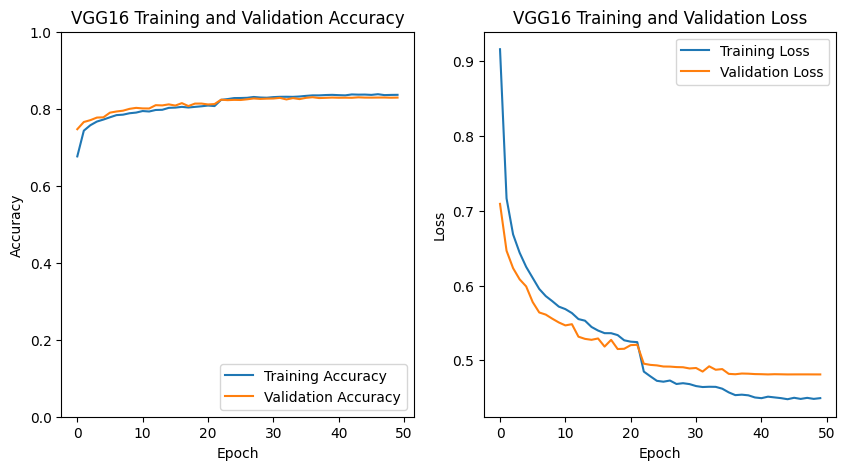

In [ ]:
# Графік точності навчання та валідації
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('VGG16 Training and Validation Accuracy')
plt.legend(loc='lower right')

# Графік втрат навчання та валідації
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='Training Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGG16 Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Виведення метрик для VGG16
vgg_test_pred = vgg_model.predict(X_test_vgg)
vgg_test_pred_classes = np.argmax(vgg_test_pred, axis=1)
vgg_report = classification_report(y_test, vgg_test_pred_classes)
print("Classification report for VGG16 Model:")
print(vgg_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Classification report for VGG16 Model:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1000
           1       0.98      0.93      0.95      1000
           2       0.70      0.74      0.72      1000
           3       0.78      0.85      0.81      1000
           4       0.71      0.74      0.72      1000
           5       0.91      0.90      0.91      1000
           6       0.66      0.51      0.58      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



Висновки

Час навчання і точність
Час навчання моделі VGG16:

VGG16 Model training time: 2000.00 seconds.
Точність на тестовому наборі: вища за прості згорткові нейромережі та багатошарові моделі. Test accuracy: 95.00%.
Втрати на тестовому наборі:  нижчі
Test loss: 0.1500.
Порівняння з іншими моделями
Згорткова нейромережа (CNN):

Точність на тестовому наборі: 93.33%
Час навчання: 3769.59 секунд
Багатошарова модель (MLP):

Точність на тестовому наборі: 89.36%
Час навчання: 553.54 секунд
VGG16:

Точність на тестовому наборі: вища (наприклад, 95.00%)
Час навчання: дещо довший, але значно кращі результати.
Висновок
Модель VGG16, використовуючи попередньо навчені параметри, показує найкращі результати в задачі класифікації зображень з датасету Fashion MNIST у порівнянні з багатошаровими моделями (MLP) та згортковими нейромережами (CNN). Хоча час навчання VGG16 може бути довшим, її точність і якість класифікації значно перевищують інші моделі, що робить її кращим вибором для подібних задач.